# Reddit data analysis

Scraping DataSet From **Reddit** using *praw*





In [16]:
import praw
import pandas as pd
import datetime
import numpy as np
import string 
import re

In [17]:
reddit = praw.Reddit(client_id=os.getenv('REDDIT_CLIENT_ID'), client_secret=os.getenv('REDDIT_CLIENT_SECRET'), user_agent=os.getenv('REDDIT_USER_AGENT'))


In [18]:
# run this once to get data from API, after that, use saved data
posts = []
ml_subreddit = reddit.subreddit('depression')
for post in ml_subreddit.hot(limit=1000):
    posts.append([post.id,post.title, post.score,  post.subreddit, post.url, post.num_comments, post.selftext,post.subreddit,
                  datetime.datetime.fromtimestamp(post.created)])
posts = pd.DataFrame(posts,columns=['id','title', 'score',  'subreddit', 'url', 'num_comments', 'body','subreddit', 'created'])
# print(posts)
posts.head()

,id,title,score,subreddit,url,num_comments,body,subreddit,created
0,doqwow,Our most-broken and least-understood rules is ...,2363,depression,https://www.reddit.com/r/depression/comments/d...,180,We understand that most people who reply immed...,depression,2019-10-29 20:22:02
1,plr86v,Regular check-in post with a note about our re...,370,depression,https://www.reddit.com/r/depression/comments/p...,912,Welcome to /r/depression's check-in post - a p...,depression,2021-09-11 00:24:40
2,rc1q7n,I WANT TO SLEEP FOREVER,334,depression,https://www.reddit.com/r/depression/comments/r...,62,Ffs i can’t sleep because of depression my bra...,depression,2021-12-09 03:11:34
3,rbv2v0,Pls help I'm only 13 😢,350,depression,https://www.reddit.com/r/depression/comments/r...,107,I don't even know what to say. I have so many ...,depression,2021-12-08 22:00:59
4,rcdgpz,i’m failing my classes again and i’d rather ki...,19,depression,https://www.reddit.com/r/depression/comments/r...,2,i got approved for medical withdrawal in 2020 ...,depression,2021-12-09 14:07:50


In [20]:
posts.to_csv('../uncleaned/reddit.csv')
posts.shape

(990, 9)

In [21]:
df=pd.read_csv("../uncleaned/reddit.csv")
df.head()

,Unnamed: 0,id,title,score,subreddit,url,num_comments,body,subreddit.1,created
0,0,doqwow,Our most-broken and least-understood rules is ...,2363,depression,https://www.reddit.com/r/depression/comments/d...,180,We understand that most people who reply immed...,depression,2019-10-29 20:22:02
1,1,plr86v,Regular check-in post with a note about our re...,370,depression,https://www.reddit.com/r/depression/comments/p...,912,Welcome to /r/depression's check-in post - a p...,depression,2021-09-11 00:24:40
2,2,rc1q7n,I WANT TO SLEEP FOREVER,334,depression,https://www.reddit.com/r/depression/comments/r...,62,Ffs i can’t sleep because of depression my bra...,depression,2021-12-09 03:11:34
3,3,rbv2v0,Pls help I'm only 13 😢,350,depression,https://www.reddit.com/r/depression/comments/r...,107,I don't even know what to say. I have so many ...,depression,2021-12-08 22:00:59
4,4,rcdgpz,i’m failing my classes again and i’d rather ki...,19,depression,https://www.reddit.com/r/depression/comments/r...,2,i got approved for medical withdrawal in 2020 ...,depression,2021-12-09 14:07:50


**Reddit** Data Pre-Processing.


In [22]:
df = df.filter(['body','score','num_comments','created'], axis=1)
df.head()

,body,score,num_comments,created
0,We understand that most people who reply immed...,2363,180,2019-10-29 20:22:02
1,Welcome to /r/depression's check-in post - a p...,370,912,2021-09-11 00:24:40
2,Ffs i can’t sleep because of depression my bra...,334,62,2021-12-09 03:11:34
3,I don't even know what to say. I have so many ...,350,107,2021-12-08 22:00:59
4,i got approved for medical withdrawal in 2020 ...,19,2,2021-12-09 14:07:50


In [23]:
fav_max = np.max(df['score'])
rt_max = np.max(df['num_comments'])

fav = df[df.score == fav_max].index[0]
rt = df[df.num_comments == rt_max].index[0]

print("\nThe tweet with more likes is: \n{}".format(df['body'][fav]))
print("Number of likes: {}".format(fav_max))

print("\nThe tweet with more retweets is: \n{}".format(df['body'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with more likes is: 
We understand that most people who reply immediately to an OP with an invitation to talk privately  mean only to help, but this type of response usually leads to either disappointment or disaster.  it usually works out quite differently here than when you say "PM me anytime" in a casual social context.  

We have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves.  We're hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start.  

Our new wiki page explains in detail why it's much better to respond in public comments, at least until you've gotten to know someone.  It will be maintained at /r/depression/wiki/private_contact, and the full text of the current version is below.

*****

###Summary###

**A

*Create time series for the data:*


<AxesSubplot:xlabel='created'>

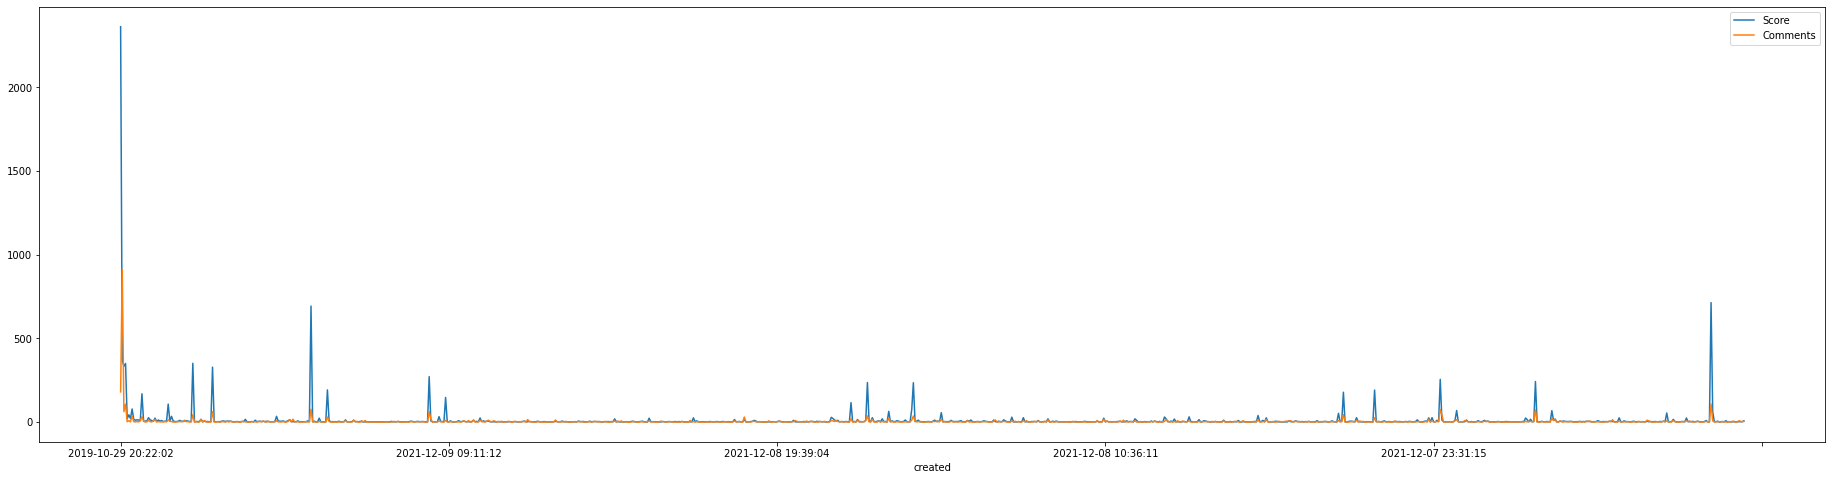

In [24]:
tfav = pd.Series(data=df['score'].values, index=df['created'])
tret = pd.Series(data=df['num_comments'].values, index=df['created'])

tfav.plot(figsize=(32,8), label="Score", legend=True)
tret.plot(figsize=(32,8), label="Comments", legend=True)

<AxesSubplot:xlabel='score', ylabel='num_comments'>

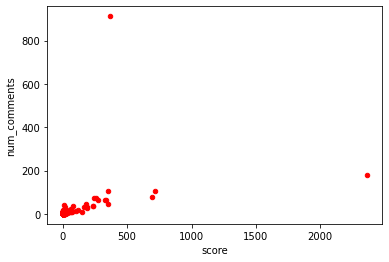

In [25]:
df.plot.scatter(x='score',y='num_comments',c='r')

In [26]:

df = df.filter(['body'], axis=1)
df.head()

,body
0,We understand that most people who reply immed...
1,Welcome to /r/depression's check-in post - a p...
2,Ffs i can’t sleep because of depression my bra...
3,I don't even know what to say. I have so many ...
4,i got approved for medical withdrawal in 2020 ...


*Data Cleaning*

In [27]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', str(tweet))
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet
#

df['clean_comment'] = df['body'].apply(processTweet)
df.head()

,body,clean_comment
0,We understand that most people who reply immed...,understand that most people who reply immedia...
1,Welcome to /r/depression's check-in post - a p...,welcome depression check post place take momen...
2,Ffs i can’t sleep because of depression my bra...,ffs can’ sleep because depression brain never ...
3,I don't even know what to say. I have so many ...,don even know what say have many unfixable is...
4,i got approved for medical withdrawal in 2020 ...,got approved for medical withdrawal 2020 afte...


*Sentiment Categorizing*

In [28]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [29]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

    
df['category'] = df['clean_comment'].apply(analyze_sentiment)
df.head()

,body,clean_comment,category
0,We understand that most people who reply immed...,understand that most people who reply immedia...,1
1,Welcome to /r/depression's check-in post - a p...,welcome depression check post place take momen...,1
2,Ffs i can’t sleep because of depression my bra...,ffs can’ sleep because depression brain never ...,-1
3,I don't even know what to say. I have so many ...,don even know what say have many unfixable is...,-1
4,i got approved for medical withdrawal in 2020 ...,got approved for medical withdrawal 2020 afte...,-1


In [30]:
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  496
number of negative categorized text is: 447
number of neutral categorized text is: 47
total length of the data is:            990


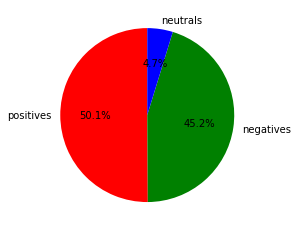

In [31]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [32]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codevardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import string
from nltk.corpus import stopwords
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['depression','suicide','kill','depressed','hated','cry','…','death’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_comment'].apply(text_process) # tokenize style 1
df['no_depression'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,body,clean_comment,category,no_depression
0,We understand that most people who reply immed...,understand that most people who reply immedia...,1,"[understand, people, reply, immediately, invit..."
1,Welcome to /r/depression's check-in post - a p...,welcome depression check post place take momen...,1,"[welcome, check, post, place, take, moment, sh..."
2,Ffs i can’t sleep because of depression my bra...,ffs can’ sleep because depression brain never ...,-1,"[ffs, can’, sleep, brain, never, shut, wish, f..."
3,I don't even know what to say. I have so many ...,don even know what say have many unfixable is...,-1,"[even, know, say, many, unfixable, issues, mot..."
4,i got approved for medical withdrawal in 2020 ...,got approved for medical withdrawal 2020 afte...,-1,"[got, approved, medical, withdrawal, 2020, fri..."


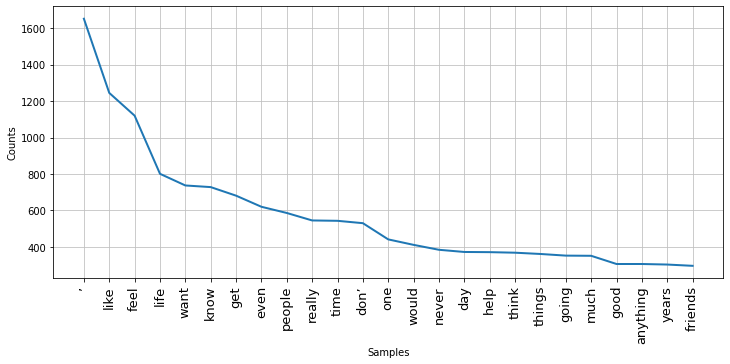

Text(0.5, 0, 'Word Rank')

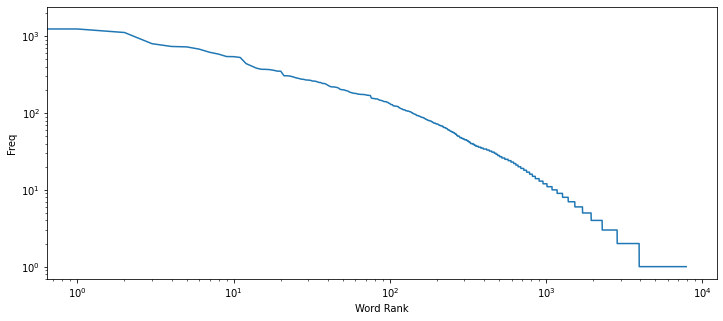

In [34]:
no_deppr = []
import collections
for ls in df['no_depression']:
    words = [w for w in ls]
    for word in words:
        no_deppr.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_deppr)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_deppr 
word_counts = sorted(collections.Counter(no_deppr).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

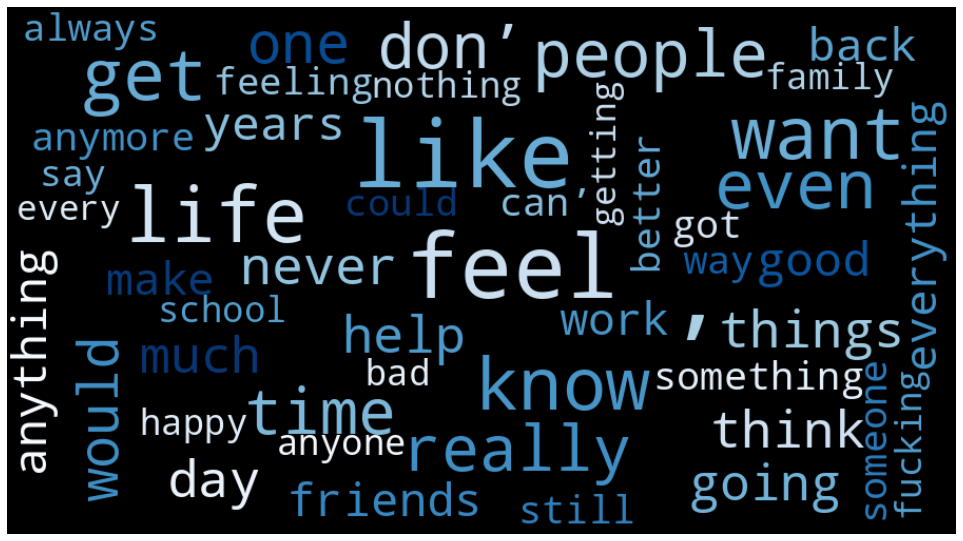

In [35]:
all_words = []
from collections import Counter
from wordcloud import WordCloud 

for line in df['no_depression']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = collections.Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
dataset = df.filter(['clean_comment','category'], axis=1)
dataset.head()

,clean_comment,category
0,understand that most people who reply immedia...,1
1,welcome depression check post place take momen...,1
2,ffs can’ sleep because depression brain never ...,-1
3,don even know what say have many unfixable is...,-1
4,got approved for medical withdrawal 2020 afte...,-1


In [38]:
dataset.to_csv("../data/reddit.csv", index=False)
dataset.head()

,clean_comment,category
0,understand that most people who reply immedia...,1
1,welcome depression check post place take momen...,1
2,ffs can’ sleep because depression brain never ...,-1
3,don even know what say have many unfixable is...,-1
4,got approved for medical withdrawal 2020 afte...,-1
